In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
blobs = pd.read_csv('../DATA/cluster_blobs.csv')

In [3]:
blobs

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479
...,...,...
1495,0.882673,-6.786272
1496,0.946854,-7.254512
1497,3.180138,6.608660
1498,5.454552,6.461246


<AxesSubplot:xlabel='X1', ylabel='X2'>

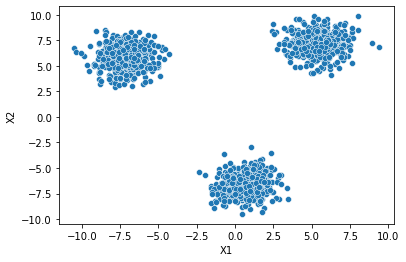

In [4]:
sns.scatterplot(data=blobs,x='X1',y='X2')

In [5]:
moons = pd.read_csv('../DATA/cluster_moons.csv')

In [6]:
moons

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164
...,...,...
1495,1.957344,0.187184
1496,0.962394,0.384304
1497,-0.761893,0.581666
1498,1.803858,-0.154705


<AxesSubplot:xlabel='X1', ylabel='X2'>

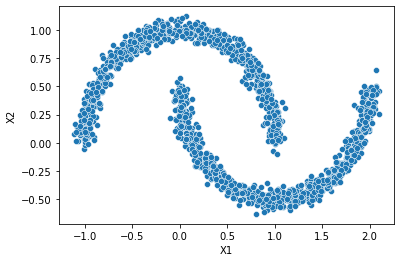

In [7]:
sns.scatterplot(data=moons, x='X1', y='X2')

In [8]:
circles = pd.read_csv('../DATA/cluster_circles.csv')

In [9]:
circles

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354
...,...,...
1495,-0.297506,0.077834
1496,0.082555,-0.270371
1497,0.279533,-0.109435
1498,0.027432,-0.264891


<AxesSubplot:xlabel='X1', ylabel='X2'>

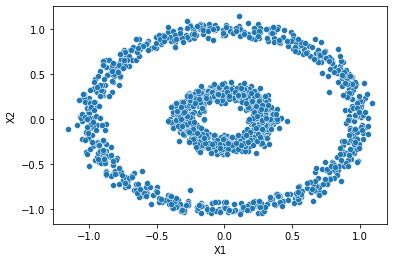

In [10]:
sns.scatterplot(data=circles, x='X1', y='X2')

In [11]:
def run_model(model, data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data, x='X1', y='X2', hue=labels, palette='Set1')

In [12]:
from sklearn.cluster import KMeans

In [13]:
model = KMeans(n_clusters=3)

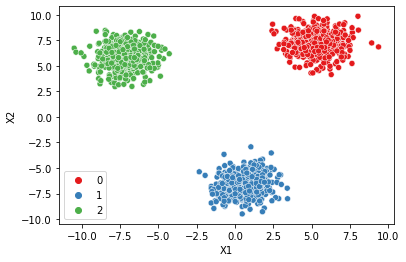

In [14]:
run_model(model, blobs)

In [16]:
model = KMeans(n_clusters=2)

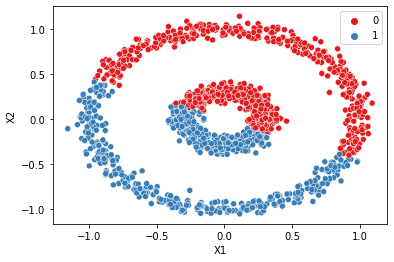

In [17]:
run_model(model, circles)

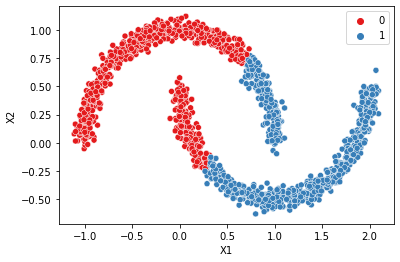

In [18]:
run_model(model, moons)

In [19]:
from sklearn.cluster import DBSCAN

Let's first try with just the default DBSCAN model and see what we get before we do any hyper-parameter tunning

In [20]:
model = DBSCAN()

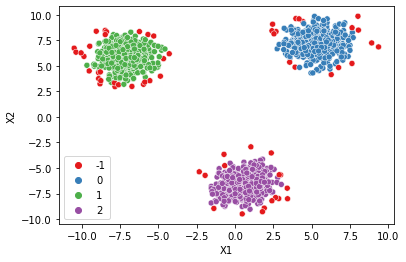

In [21]:
run_model(model, blobs)

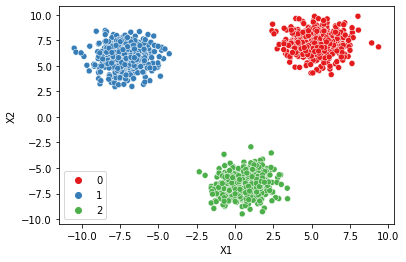

In [29]:
model = DBSCAN(eps=1.5)
run_model(model, blobs)

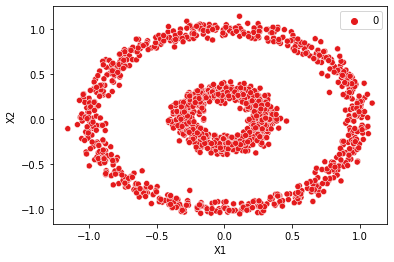

In [22]:
run_model(model, circles)

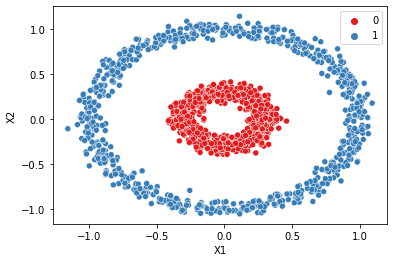

In [24]:
model = DBSCAN(eps=0.15)
run_model(model, circles)

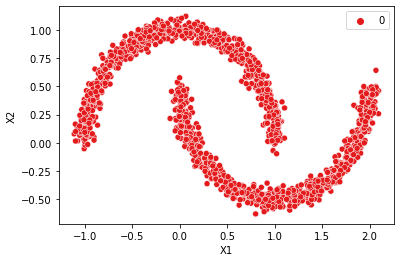

In [23]:
run_model(model, moons)

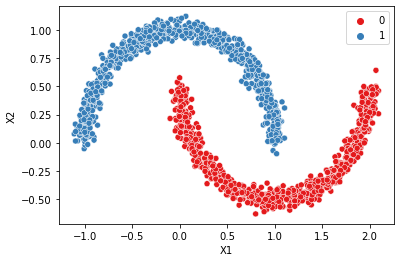

In [25]:
model = DBSCAN(eps=0.15)
run_model(model, moons)

Exploring Hyperparameter tunning for DBSCAN

In [30]:
two_blobs = pd.read_csv('../DATA/cluster_two_blobs.csv')
two_blobs_outliers = pd.read_csv('../DATA/cluster_two_blobs_outliers.csv')

In [31]:
two_blobs

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215
...,...,...
995,-9.895227,-6.644544
996,-9.544007,-6.060362
997,0.713958,1.560460
998,0.954444,0.889178


In [32]:
two_blobs_outliers

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215
...,...,...
998,0.954444,0.889178
999,-8.867767,-5.635758
1000,-4.000000,-2.000000
1001,0.000000,-8.000000


<AxesSubplot:xlabel='X1', ylabel='X2'>

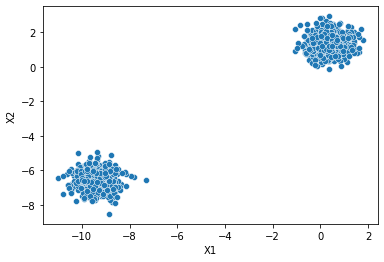

In [33]:
sns.scatterplot(data=two_blobs, x='X1', y='X2')

<AxesSubplot:xlabel='X1', ylabel='X2'>

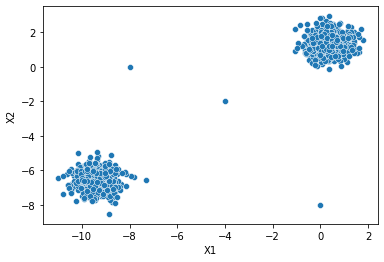

In [34]:
sns.scatterplot(data=two_blobs_outliers, x='X1', y='X2')

In [ ]:
#getting outlier percentage

In [35]:
model = DBSCAN()

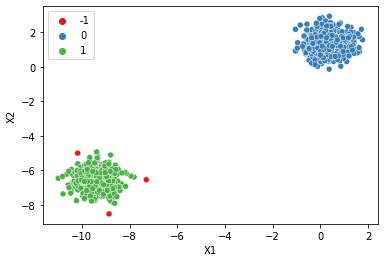

In [37]:
run_model(model, two_blobs)

In [40]:
np.sum(model.labels_ == -1)

3

In [43]:
100*np.sum(model.labels_ == -1) / len(model.labels_)

0.3

Chartting episolon values

Let's chart it on the two blobs outliers ds

In [46]:
number_of_ouliers = []
outlier_percentage = []

for eps in np.linspace(0.001, 10, 100):
    model = DBSCAN(eps=eps)
    model.fit(two_blobs_outliers)
    
    number_of_ouliers.append(np.sum(model.labels_ == -1))
    
    outliers = 100*np.sum(model.labels_ == -1) / len(model.labels_)
    outlier_percentage.append(outliers)

Text(0.5, 0, 'Epsilon Value')

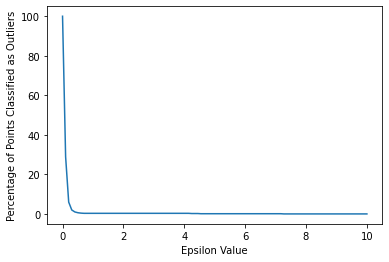

In [48]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percentage)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

(0.0, 1.0)

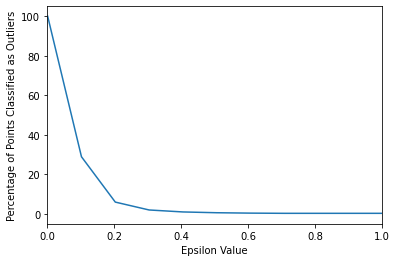

In [49]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percentage)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.xlim(0,1)

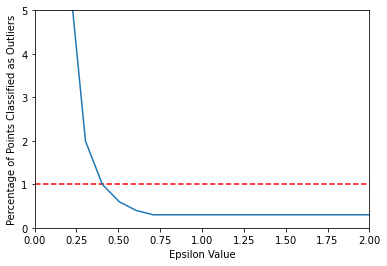

In [50]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percentage)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,5)
plt.xlim(0,2)
plt.hlines(y=1,xmin=0,xmax=2,colors='red',ls='--')

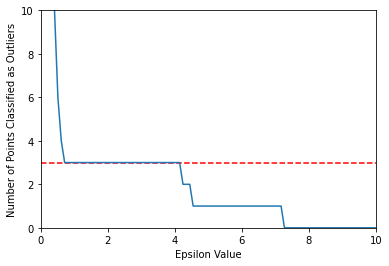

In [54]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_ouliers)
plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,10)
plt.xlim(0,10)
plt.hlines(y=3,xmin=0,xmax=10,colors='red',ls='--')

In [55]:
model = DBSCAN(eps=1)

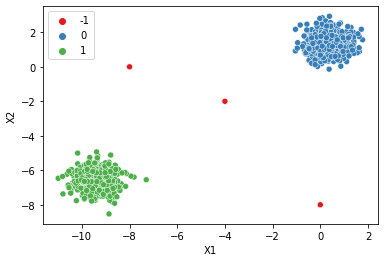

In [56]:
run_model(model, two_blobs_outliers)

Choosing a minimum number of points

In [57]:

outlier_percentage = []

for k in np.arange(1,100,1):
    model = DBSCAN(min_samples=k)
    model.fit(two_blobs_outliers)
    
    
    outliers = 100*np.sum(model.labels_ == -1) / len(model.labels_)
    outlier_percentage.append(outliers)

Text(0.5, 0, 'Minimum Number of Samples')

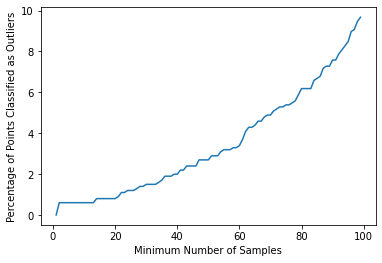

In [58]:
sns.lineplot(x=np.arange(1,100),y=outlier_percentage)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Minimum Number of Samples")

Good rule of thumb is to use 2*num_of_features

In [62]:
model = DBSCAN(min_samples=4)

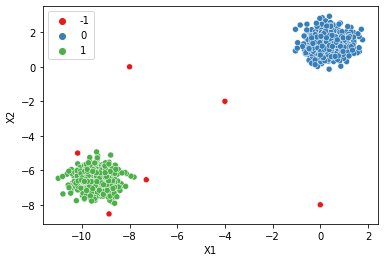

In [63]:
run_model(model, two_blobs_outliers)

In [64]:
model = DBSCAN(eps=1, min_samples=4)

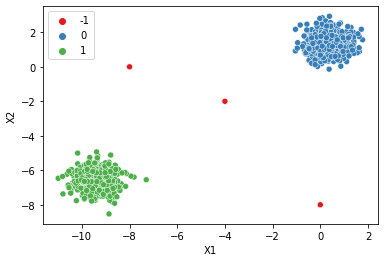

In [65]:
run_model(model, two_blobs_outliers)